# IPL match analysis

## Importing the dataset and basic analysis

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("matches.csv")

In [3]:
# Display the first few rows of the dataset
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
# Descriptive statistics of numerical columns
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [6]:
# Check for missing values
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

# Loading the other Dataset.

In [7]:
deliveries_df = pd.read_csv("deliveries.csv")

In [8]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
# Basic information about the dataset
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [10]:
# Descriptive statistics of numerical columns
deliveries_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [11]:
# Check for missing values
deliveries_df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

# Merging the two datasets.

In [14]:
# Attempting to merge using option A: left=match_id, right=id
merged_option_A = pd.merge(deliveries_df, df, left_on='match_id', right_on='id', how='inner')

In [15]:
# Attempting to merge using option B: left=match_id, right=dl_applied
merged_option_B = pd.merge(deliveries_df, df, left_on='match_id', right_on='dl_applied', how='inner')

In [16]:
# Display the merged DataFrames
print("Merged DataFrame using option A:")
print(merged_option_A.head())

Merged DataFrame using option A:
   match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  result  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...  normal   
1     2  DA Warner    S Dhawan  TS Mills              0  ...  normal   
2     3  DA Warner    S Dhawan  TS Mills              0  ...  normal   
3     4  DA Warner    S Dhawan  TS Mills              0  ...  normal   
4     5  DA Warner    S Dhawan  TS Mills              0  ...  normal   

   dl_applied               winner  win_by_runs  win_by_wic

In [17]:
# Display the merged DataFrames
print("Merged DataFrame using option B:")
print(merged_option_B.head())

Merged DataFrame using option B:
   match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  result  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...  normal   
1     1  DA Warner    S Dhawan  TS Mills              0  ...  normal   
2     1  DA Warner    S Dhawan  TS Mills              0  ...  normal   
3     1  DA Warner    S Dhawan  TS Mills              0  ...  normal   
4     1  DA Warner    S Dhawan  TS Mills              0  ...  normal   

   dl_applied                 winner  win_by_runs  win_by_w

### As we can clearly see, option A is better, as it merges unique identifier.

### As we can see above, that in the matches.csv file, umpire3 has the highest missing values, so for 2nd answer it is option C.

In [19]:
#for matches played in cities
# Group by city and count the unique seasons
seasons_per_city = df.groupby('city')['season'].nunique()

# Find the city with the most seasons
city_with_most_seasons = seasons_per_city.idxmax()

print("City with the most number of seasons:", city_with_most_seasons)

City with the most number of seasons: Delhi


In [20]:
# Group by season and count the number of matches
matches_per_year = df['season'].value_counts()

# Find the year with the most matches played
year_with_most_matches = matches_per_year.idxmax()

print("Year with the most number of matches played:", year_with_most_matches)

Year with the most number of matches played: 2013


In [22]:
# Filter the matches for the year 2011 and where Mumbai Indians won
mumbai_indians_wins_2011 = df[(df['team1'] == 'Mumbai Indians') | (df['team2'] == 'Mumbai Indians')]
mumbai_indians_wins_2011 = mumbai_indians_wins_2011[mumbai_indians_wins_2011['season'] == 2011]
mumbai_indians_wins_2011 = mumbai_indians_wins_2011[mumbai_indians_wins_2011['winner'] == 'Mumbai Indians']

# Count the number of wins
max_wins_mumbai_indians_2011 = mumbai_indians_wins_2011['winner'].count()

print("Maximum wins by Mumbai Indians in 2011:", max_wins_mumbai_indians_2011)


Maximum wins by Mumbai Indians in 2011: 10


# Plotting for toss decision feature.

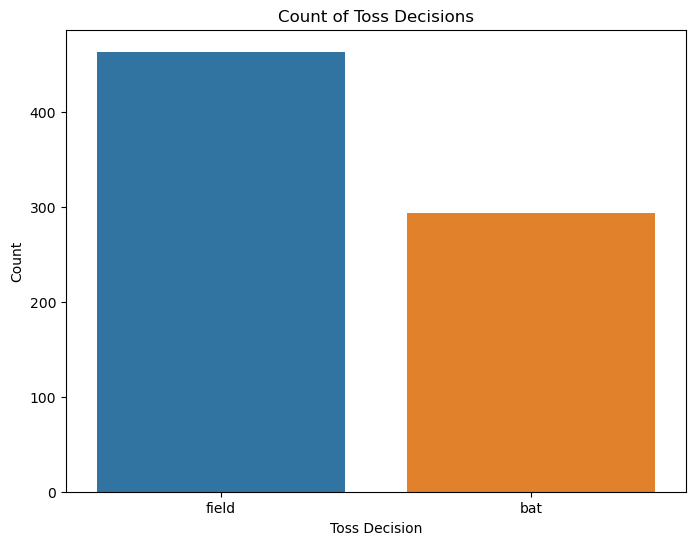

In [24]:
# Plotting the count of toss decisions
#Bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='toss_decision', data=df)
plt.title('Count of Toss Decisions')
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.show()

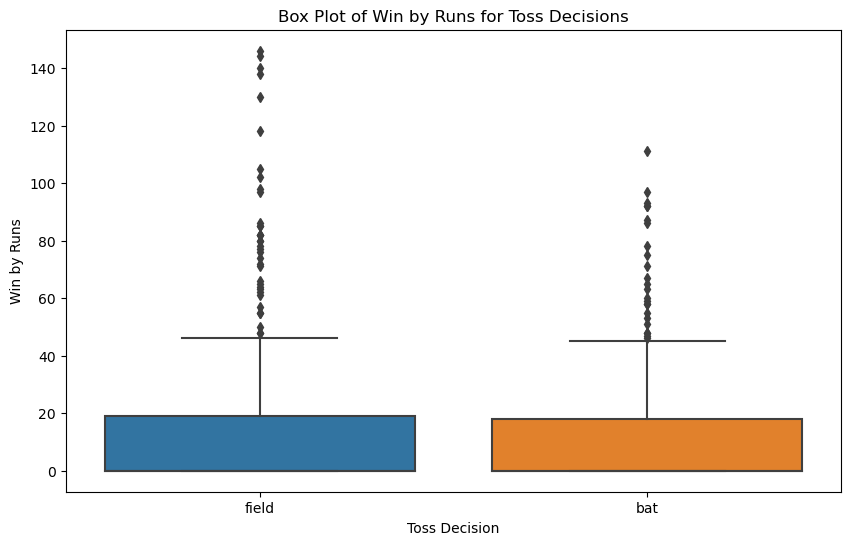

In [33]:
#Boxplot
# Box plot for toss decisions and win_by_runs
plt.figure(figsize=(10, 6))
sns.boxplot(x='toss_decision', y='win_by_runs', data=df)
plt.title('Box Plot of Win by Runs for Toss Decisions')
plt.xlabel('Toss Decision')
plt.ylabel('Win by Runs')
plt.show()

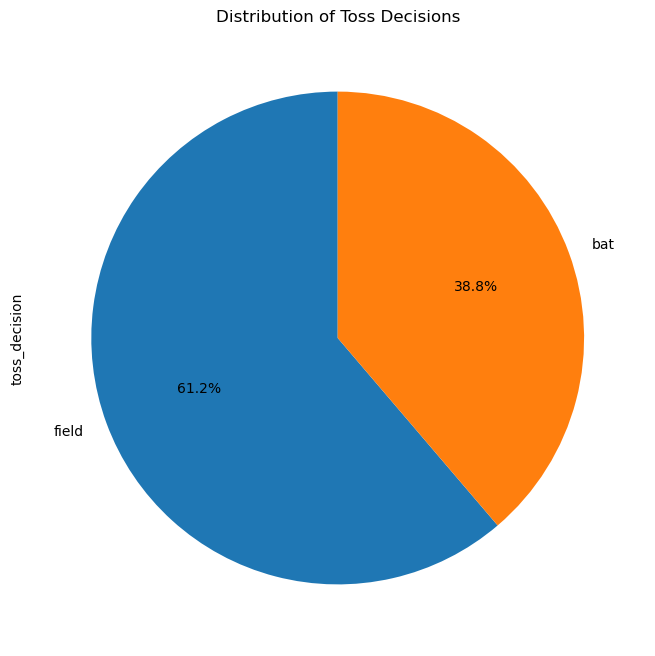

In [27]:
# Plotting a pie chart for toss decisions
plt.figure(figsize=(8, 8))
df['toss_decision'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Toss Decisions')
plt.show()

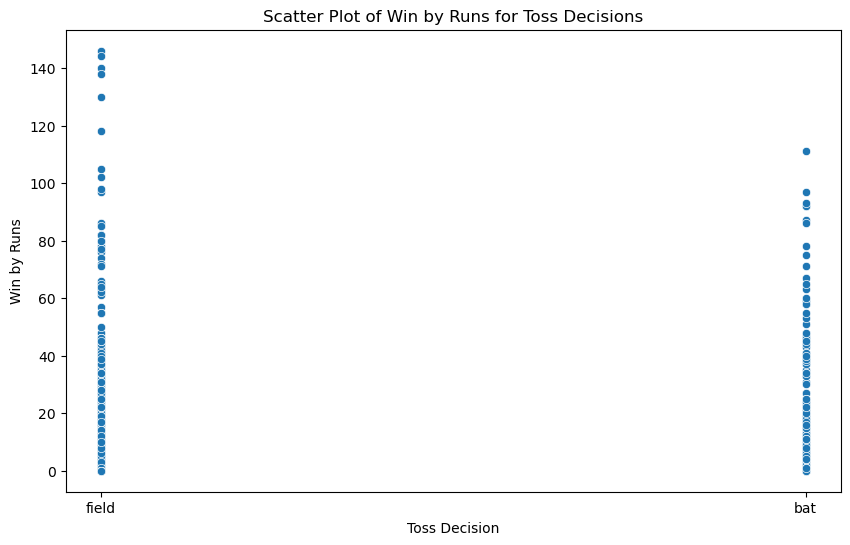

In [28]:
# Scatter plot for toss decisions and win_by_runs
plt.figure(figsize=(10, 6))
sns.scatterplot(x='toss_decision', y='win_by_runs', data=df)
plt.title('Scatter Plot of Win by Runs for Toss Decisions')
plt.xlabel('Toss Decision')
plt.ylabel('Win by Runs')
plt.show()

### As we can see only two plots that is bar plot and pie chart plot can be used for toss_decision, and other two would require additonal column to make sense, hence we need to chose the best between the bar plot and the pie chart, now the pie chart gives us the exact percentage of what decision a team made, whereas the barplot gives us a number through a bar.

# Matches won as per toss

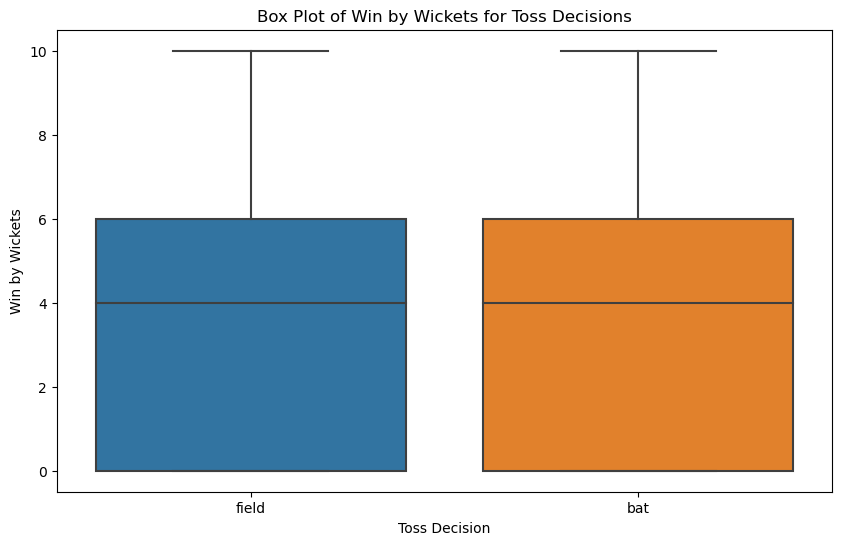

In [34]:
# Box plot for toss decisions and win_by_wickets
plt.figure(figsize=(10, 6))
sns.boxplot(x='toss_decision', y='win_by_wickets', data=df)
plt.title('Box Plot of Win by Wickets for Toss Decisions')
plt.xlabel('Toss Decision')
plt.ylabel('Win by Wickets')
plt.show()

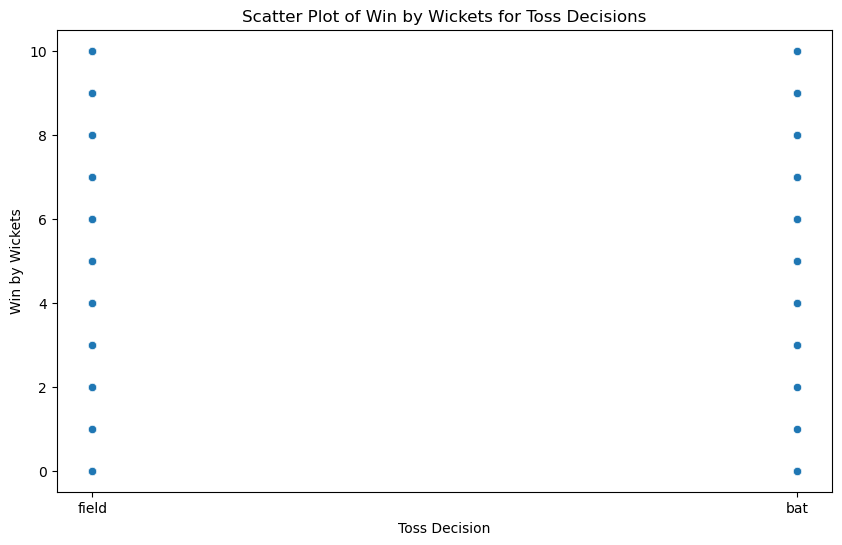

In [35]:
# Scatter plot for toss decisions and win_by_wickets
plt.figure(figsize=(10, 6))
sns.scatterplot(x='toss_decision', y='win_by_wickets', data=df)
plt.title('Scatter Plot of Win by Wickets for Toss Decisions')
plt.xlabel('Toss Decision')
plt.ylabel('Win by Wickets')
plt.show()

Number of matches won by teams electing to field first: 259
Number of matches won by teams electing to bat first: 134


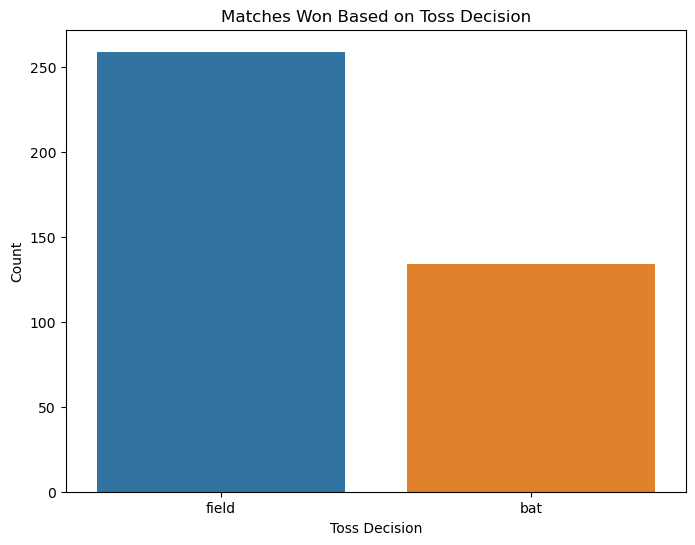

In [36]:
# Count the number of matches won based on toss decisions
toss_decision_wins = df[df['winner'] == df['toss_winner']]['toss_decision'].value_counts()

print("Number of matches won by teams electing to field first:", toss_decision_wins['field'])
print("Number of matches won by teams electing to bat first:", toss_decision_wins['bat'])

# Plotting the count of matches won based on toss decisions
plt.figure(figsize=(8, 6))
sns.countplot(x='toss_decision', data=df[df['winner'] == df['toss_winner']])
plt.title('Matches Won Based on Toss Decision')
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.show()


# Taking batting second won more number of matches

In [42]:
# Filter matches where the toss winner chose to field and won
field_wins = df[(df['toss_decision'] == 'field') & (df['toss_winner'] == df['winner'])]

# Filter matches where the toss winner chose to bat and won
bat_wins = df[(df['toss_decision'] == 'bat') & (df['toss_winner'] == df['winner'])]

# Count the number of wins for each scenario
field_wins_per_year = field_wins['season'].value_counts()
bat_wins_per_year = bat_wins['season'].value_counts()

# Display the years where batting second has won more matches
years_with_more_batting_second_wins = (field_wins_per_year > bat_wins_per_year).index

print("Years where taking batting second has won more matches:", years_with_more_batting_second_wins)

ValueError: Can only compare identically-labeled Series objects

# For question 10

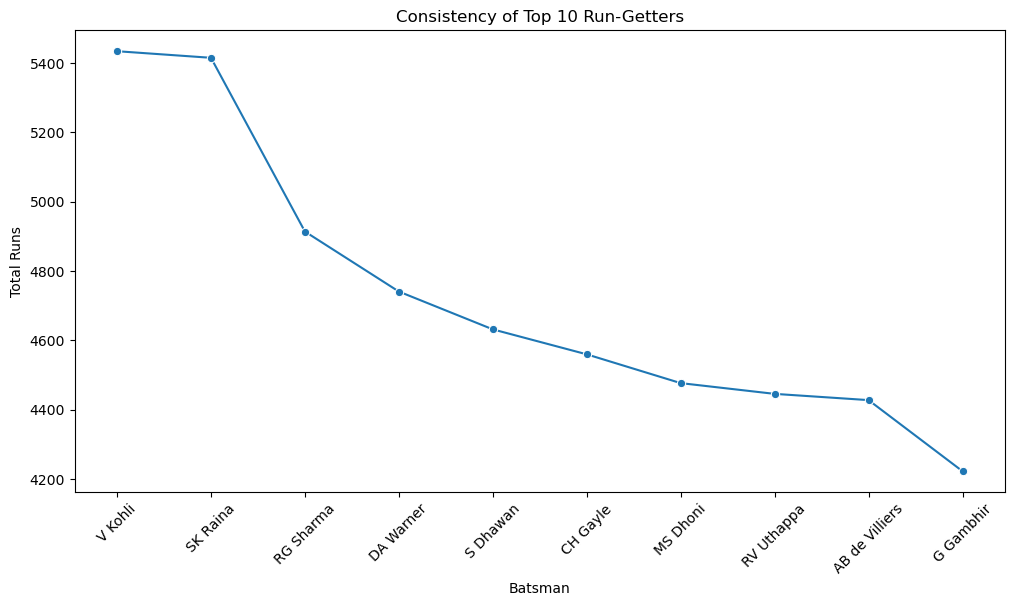

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting the top 10 run-getters based on total runs
top_10_batsmen = deliveries_df.groupby('batsman')['batsman_runs'].sum().nlargest(10).reset_index()

# Line plot for the consistency of top 10 run-getters
plt.figure(figsize=(12, 6))
sns.lineplot(x='batsman', y='batsman_runs', data=top_10_batsmen, marker='o')
plt.title('Consistency of Top 10 Run-Getters')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.show()

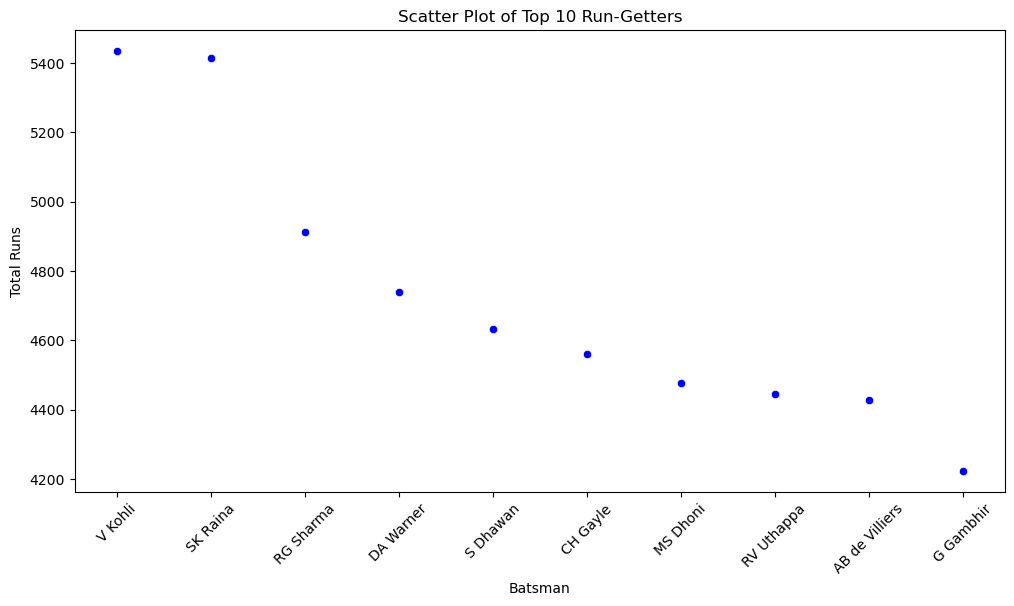

In [46]:
# Scatter plot for the top 10 run-getters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='batsman', y='batsman_runs', data=top_10_batsmen, marker='o', color='blue')
plt.title('Scatter Plot of Top 10 Run-Getters')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.show()

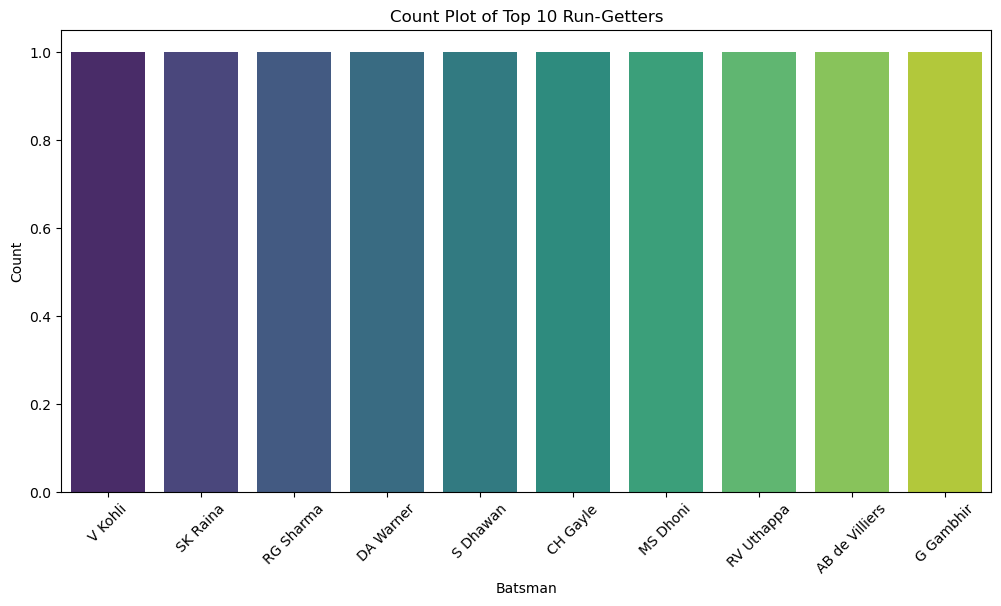

In [47]:
# Count plot for the top 10 run-getters
plt.figure(figsize=(12, 6))
sns.countplot(x='batsman', data=top_10_batsmen, palette='viridis')
plt.title('Count Plot of Top 10 Run-Getters')
plt.xlabel('Batsman')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

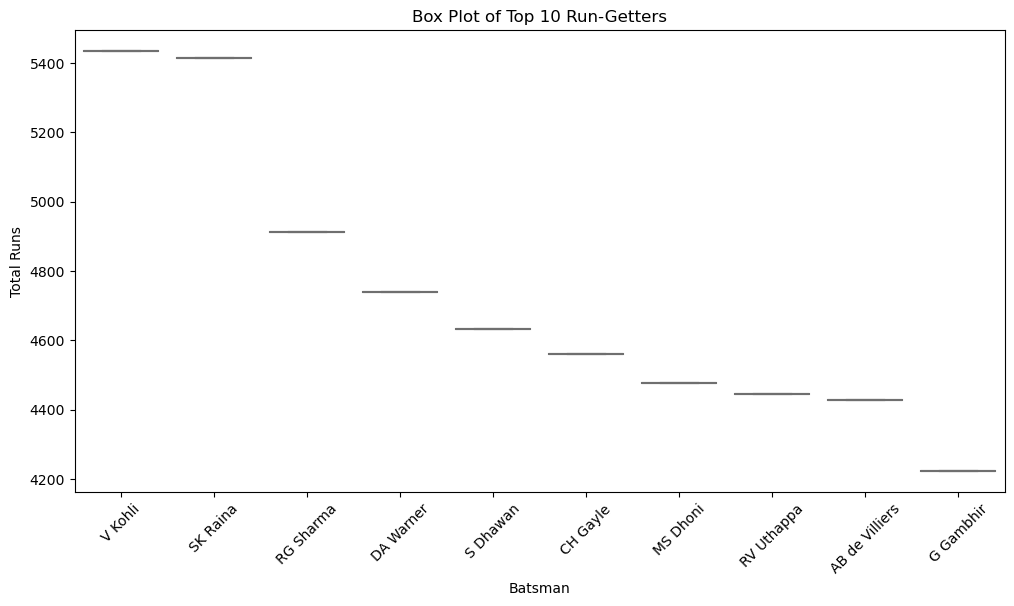

In [48]:
# Box plot for the top 10 run-getters
plt.figure(figsize=(12, 6))
sns.boxplot(x='batsman', y='batsman_runs', data=top_10_batsmen, palette='pastel')
plt.title('Box Plot of Top 10 Run-Getters')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.show()

### As we can see, line plot is the best.

# Question 11

In [54]:
import pandas as pd

# Filter data for the year 2019
merged_2019 = merged_option_A[merged_option_A['season'] == 2019]

# Filter data for 4's and 6's
fours_sixes_2019 = merged_2019[merged_2019['batsman_runs'].isin([4, 6])]

# Count the number of 4's and 6's hit by each batsman
batsman_runs_count_2019 = fours_sixes_2019.groupby('batsman')['batsman_runs'].count().reset_index()

# Find the batsman with the highest count
highest_scorer_2019 = batsman_runs_count_2019.loc[batsman_runs_count_2019['batsman_runs'].idxmax()]

print("Batsman with the highest number of 4's and 6's in 2019:", highest_scorer_2019['batsman'])

Batsman with the highest number of 4's and 6's in 2019: AD Russell


# Question 12

In [55]:
# Count the number of wickets taken by each bowler
wickets_count = deliveries_df[deliveries_df['dismissal_kind'].notnull()].groupby('bowler')['dismissal_kind'].count().reset_index()

# Find the bowler with the most number of wickets
most_wickets_bowler = wickets_count.loc[wickets_count['dismissal_kind'].idxmax()]

print("Bowler with the most number of wickets:", most_wickets_bowler['bowler'])

Bowler with the most number of wickets: SL Malinga


# Question 13

In [58]:
# Filter data for Virat Kohli in 2016
kohli_2016 = merged_option_A[(merged_option_A['batsman'] == 'V Kohli') & (merged_option_A['season'] == 2016)]

# Calculate total runs and total balls faced by Kohli in 2016
total_runs_kohli_2016 = kohli_2016['batsman_runs'].sum()
total_balls_faced_kohli_2016 = kohli_2016.shape[0]

# Calculate strike rate
strike_rate_kohli_2016 = (total_runs_kohli_2016 / total_balls_faced_kohli_2016) * 100

print("Strike Rate of Virat Kohli in 2016:", round(strike_rate_kohli_2016, 2))


Strike Rate of Virat Kohli in 2016: 148.55


# Question 14

In [60]:
# Filter data for extras
extras_data = deliveries_df[deliveries_df['extra_runs'] > 0]

# Count the number of extras bowled by each bowler
extras_count = extras_data.groupby('bowler')['extra_runs'].count().reset_index()

# Find the bowler with the maximum number of extras
max_extras_bowler = extras_count.loc[extras_count['extra_runs'].idxmax()]

print("Bowler with the maximum number of extras:", max_extras_bowler['bowler'])


Bowler with the maximum number of extras: SL Malinga


# Question 15

In [62]:

# Count the number of matches hosted by each venue
venue_counts = df['venue'].value_counts()

# Find the venue with the most number of matches
most_matches_venue = venue_counts.idxmax()

print("Venue that has hosted the most number of IPL matches:", most_matches_venue)


Venue that has hosted the most number of IPL matches: Eden Gardens


# Question 16

In [64]:
# Filter data for the Sunrisers Hyderabad vs. Royal Challengers Bangalore match in 2017
match_2017 = df[(df['team1'] == 'Sunrisers Hyderabad') &
                         (df['team2'] == 'Royal Challengers Bangalore') &
                         (df['season'] == 2017)]

# Get the Player of the Match for the specified match
player_of_match = match_2017['player_of_match'].values[0]

print("Player of the Match in the Sunrisers Hyderabad vs. Royal Challengers Bangalore match in 2017:", player_of_match)


Player of the Match in the Sunrisers Hyderabad vs. Royal Challengers Bangalore match in 2017: Yuvraj Singh


# Question 17

In [69]:
# Filter data for run-outs
run_outs_data = deliveries_df[deliveries_df['dismissal_kind'] == 'run out']

# Count the number of run-out dismissals for each fielder
run_out_fielder_count = run_outs_data['fielder'].value_counts().reset_index()

# Rename the columns for better readability
run_out_fielder_count.columns = ['fielder', 'run_out_dismissals']

# Get the top three fielders with the most number of run-out dismissals
top_three_run_out_fielders = run_out_fielder_count.head(3)

print("Top three fielders with the most number of run-out dismissals:")
print(top_three_run_out_fielders[['fielder', 'run_out_dismissals']])


Top three fielders with the most number of run-out dismissals:
     fielder  run_out_dismissals
0   MS Dhoni                  23
1  RA Jadeja                  20
2    V Kohli                  17


# Question 18

In [70]:
# Filter data for V Kohli facing JJ Bumrah
kohli_vs_bumrah = deliveries_df[(deliveries_df['batsman'] == 'V Kohli') & (deliveries_df['bowler'] == 'JJ Bumrah')]

# Calculate the total runs scored by V Kohli against JJ Bumrah
total_runs_kohli_vs_bumrah = kohli_vs_bumrah['batsman_runs'].sum()

print("Total runs scored by V Kohli when the bowler was JJ Bumrah:", total_runs_kohli_vs_bumrah)


Total runs scored by V Kohli when the bowler was JJ Bumrah: 112


# Question 19

In [71]:
# Filter data for caught and bowled dismissals
caught_and_bowled_data = deliveries_df[deliveries_df['dismissal_kind'] == 'caught and bowled']

# Count the number of times each player was dismissed via caught and bowled
caught_and_bowled_count = caught_and_bowled_data['player_dismissed'].value_counts().reset_index()

# Rename the columns for better readability
caught_and_bowled_count.columns = ['player', 'caught_and_bowled_count']

# Get the player dismissed the most via caught and bowled
max_caught_and_bowled_player = caught_and_bowled_count.loc[caught_and_bowled_count['caught_and_bowled_count'].idxmax()]

print("Player dismissed the maximum number of times via caught and bowled:", max_caught_and_bowled_player['player'])


Player dismissed the maximum number of times via caught and bowled: SK Raina


# Question 20

In [72]:
# Filter data for sixes
sixes_data = deliveries_df[deliveries_df['batsman_runs'] == 6]

# Count the number of sixes hit by each player
sixes_count = sixes_data['batsman'].value_counts().reset_index()

# Rename the columns for better readability
sixes_count.columns = ['player', 'sixes_count']

# Get the player with the highest hard-hitting ability
max_sixes_player = sixes_count.loc[sixes_count['sixes_count'].idxmax()]

print("Player with the highest hard-hitting ability:", max_sixes_player['player'])


Player with the highest hard-hitting ability: CH Gayle
